# Analisis Datos


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = pd.read_csv('./Data/Covid/200809COVID19MEXICO.csv',engine='python',encoding="ISO-8859-1")

In [3]:
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-09,11c49c,2,3,2,1,2,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-09,144935,2,3,2,2,26,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,2020-08-09,010133,2,4,26,1,26,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1091695 non-null  object
 1   ID_REGISTRO          1091695 non-null  object
 2   ORIGEN               1091695 non-null  int64 
 3   SECTOR               1091695 non-null  int64 
 4   ENTIDAD_UM           1091695 non-null  int64 
 5   SEXO                 1091695 non-null  int64 
 6   ENTIDAD_NAC          1091695 non-null  int64 
 7   ENTIDAD_RES          1091695 non-null  int64 
 8   MUNICIPIO_RES        1091695 non-null  int64 
 9   TIPO_PACIENTE        1091695 non-null  int64 
 10  FECHA_INGRESO        1091695 non-null  object
 11  FECHA_SINTOMAS       1091695 non-null  object
 12  FECHA_DEF            1091695 non-null  object
 13  INTUBADO             1091695 non-null  int64 
 14  NEUMONIA             1091695 non-null  int64 
 15  EDAD           

In [5]:
datos.drop(columns=['FECHA_ACTUALIZACION','ID_REGISTRO','MUNICIPIO_RES','ENTIDAD_NAC'],inplace=True)

In [6]:
datos['Vive']= datos['FECHA_DEF'].apply(lambda current: 1 if current == '9999-99-99' else 0)
datos.head()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Vive
0,2,3,2,1,2,1,2020-05-18,2020-05-15,9999-99-99,97,...,2,2,2,1,1,99,MÃ©xico,99,97,1
1,2,3,2,2,2,1,2020-05-26,2020-05-22,9999-99-99,97,...,2,2,2,1,1,99,MÃ©xico,99,97,1
2,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,2,...,2,2,2,99,1,99,MÃ©xico,99,2,1
3,2,4,26,1,26,1,2020-03-23,2020-03-12,9999-99-99,97,...,2,2,2,99,1,99,MÃ©xico,99,97,1
4,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,1,...,1,2,2,1,1,99,MÃ©xico,99,2,0


In [7]:
vivos = 0
muertos = 0
for sobrevive in datos['Vive']:
    if sobrevive == 1:
        vivos = vivos+1
    else:
        muertos = muertos+1
print('Vivoos {}'.format(vivos))
print('Muertos {}'.format(muertos))

Vivoos 1024530
Muertos 67165


In [8]:
muertesPorCovid = 0
for sobrevive, resultado in zip(datos.Vive,datos.RESULTADO):
    if sobrevive == 0:
        if resultado == 1:
            muertesPorCovid+=1
muertesPorCovid

52298

In [9]:
entidades= {
1: 'AGUASCALIENTES',
2: 'BAJA CALIFORNIA',
3: 'BAJA CALIFORNIA SUR',
4: 'CAMPECHE',
5: 'COAHUILA DE ZARAGOZA',
6: 'COLIMA',
7: 'CHIAPAS',
8: 'CHIHUAHUA',
9: 'CIUDAD DE MÉXICO',
10: 'DURANGO',
11: 'GUANAJUATO',
12: 'GUERRERO',
13: 'HIDALGO',
14: 'JALISCO',
15: 'MÉXICO',
16: 'MICHOACÁN DE OCAMPO',
17: 'MORELOS',
18: 'NAYARIT',
19: 'NUEVO LEÓN',
20: 'OAXACA',
21: 'PUEBLA',
22: 'QUERÉTARO',
23: 'QUINTANA ROO',
24: 'SAN LUIS POTOSÍ',
25: 'SINALOA',
26: 'SONORA',
27: 'TABASCO',
28: 'TAMAULIPAS',
29: 'TLAXCALA',
30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
31: 'YUCATÁN',
32: 'ZACATECAS',
36: 'ESTADOS UNIDOS MEXICANOS',
97: 'NO APLICA',
98: 'SE IGNORA',
99: 'NO ESPECIFICADO'
}
entidades

{1: 'AGUASCALIENTES',
 2: 'BAJA CALIFORNIA',
 3: 'BAJA CALIFORNIA SUR',
 4: 'CAMPECHE',
 5: 'COAHUILA DE ZARAGOZA',
 6: 'COLIMA',
 7: 'CHIAPAS',
 8: 'CHIHUAHUA',
 9: 'CIUDAD DE MÉXICO',
 10: 'DURANGO',
 11: 'GUANAJUATO',
 12: 'GUERRERO',
 13: 'HIDALGO',
 14: 'JALISCO',
 15: 'MÉXICO',
 16: 'MICHOACÁN DE OCAMPO',
 17: 'MORELOS',
 18: 'NAYARIT',
 19: 'NUEVO LEÓN',
 20: 'OAXACA',
 21: 'PUEBLA',
 22: 'QUERÉTARO',
 23: 'QUINTANA ROO',
 24: 'SAN LUIS POTOSÍ',
 25: 'SINALOA',
 26: 'SONORA',
 27: 'TABASCO',
 28: 'TAMAULIPAS',
 29: 'TLAXCALA',
 30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
 31: 'YUCATÁN',
 32: 'ZACATECAS',
 36: 'ESTADOS UNIDOS MEXICANOS',
 97: 'NO APLICA',
 98: 'SE IGNORA',
 99: 'NO ESPECIFICADO'}

In [10]:
datos['ESTADO'] = datos['ENTIDAD_UM'].map(entidades)

In [11]:
datos.head()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Vive,ESTADO
0,2,3,2,1,2,1,2020-05-18,2020-05-15,9999-99-99,97,...,2,2,1,1,99,MÃ©xico,99,97,1,BAJA CALIFORNIA
1,2,3,2,2,2,1,2020-05-26,2020-05-22,9999-99-99,97,...,2,2,1,1,99,MÃ©xico,99,97,1,BAJA CALIFORNIA
2,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,2,...,2,2,99,1,99,MÃ©xico,99,2,1,CIUDAD DE MÉXICO
3,2,4,26,1,26,1,2020-03-23,2020-03-12,9999-99-99,97,...,2,2,99,1,99,MÃ©xico,99,97,1,SONORA
4,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,1,...,2,2,1,1,99,MÃ©xico,99,2,0,MÉXICO


In [12]:
ConteoEntidad = datos['ESTADO'].value_counts()
ConteoEntidad.head()


CIUDAD DE MÉXICO    252571
MÉXICO              104202
GUANAJUATO           59694
NUEVO LEÓN           55171
PUEBLA               49235
Name: ESTADO, dtype: int64

In [13]:
type(ConteoEntidad)

pandas.core.series.Series

Text(0.5, 0, 'Confirmados')

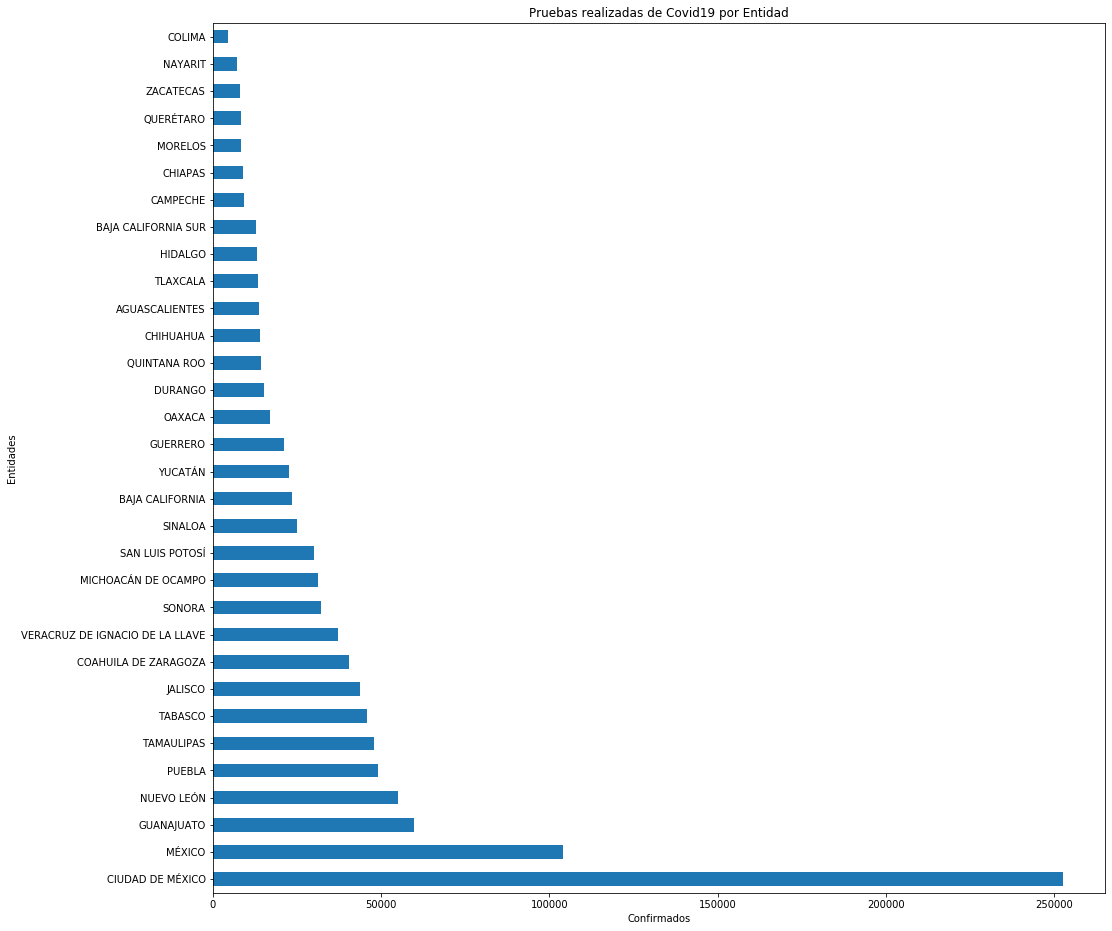

In [14]:
ConteoEntidad.plot(kind='barh', figsize= (16,16))
plt.title('Pruebas realizadas de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')

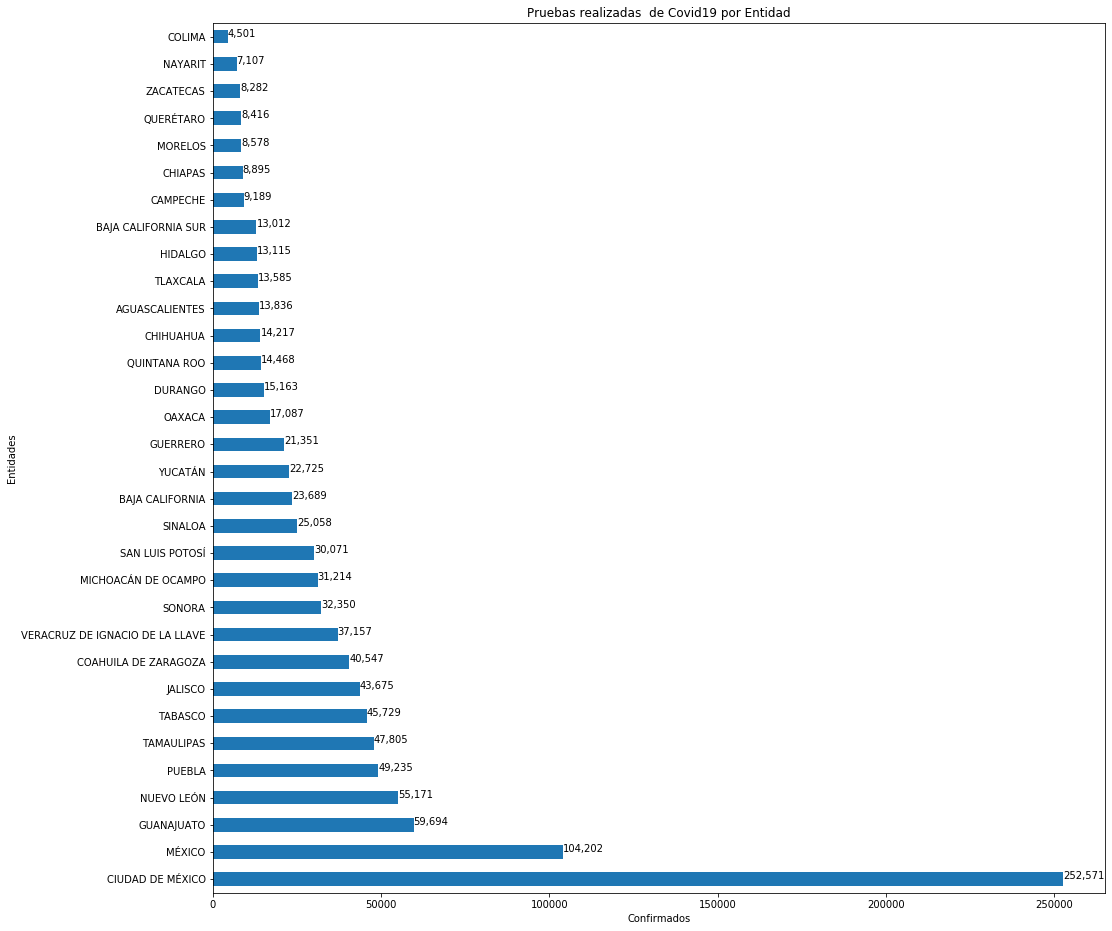

In [15]:
ConteoEntidad.plot(kind='barh', figsize= (16,16))
plt.title('Pruebas realizadas  de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in enumerate(ConteoEntidad):
    label = format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

In [16]:
confirmadosEntidad = datos.groupby('ESTADO')['RESULTADO'].value_counts()
confirmadosEntidad.head()

ESTADO           RESULTADO
AGUASCALIENTES   2             8941
                 1             4591
                 3              304
BAJA CALIFORNIA  1            14385
                 2             8195
Name: RESULTADO, dtype: int64

In [17]:
confirmadosEntidad = datos.groupby('ESTADO')['RESULTADO'].value_counts().unstack()
confirmadosEntidad.head()

RESULTADO,1,2,3
ESTADO,,,
AGUASCALIENTES,4591,8941,304
BAJA CALIFORNIA,14385,8195,1109
BAJA CALIFORNIA SUR,5451,7089,472
CAMPECHE,5112,3964,113
CHIAPAS,5713,3000,182


In [18]:
confirmadosEntidad.rename(columns={1:'Confirmados'},inplace=True)
confirmadosEntidad.head()

RESULTADO,Confirmados,2,3
ESTADO,,,
AGUASCALIENTES,4591,8941,304
BAJA CALIFORNIA,14385,8195,1109
BAJA CALIFORNIA SUR,5451,7089,472
CAMPECHE,5112,3964,113
CHIAPAS,5713,3000,182


In [19]:
confirmadosEntidad.drop([2,3],axis=1,inplace=True)
confirmadosEntidad.head()

RESULTADO,Confirmados
ESTADO,
AGUASCALIENTES,4591
BAJA CALIFORNIA,14385
BAJA CALIFORNIA SUR,5451
CAMPECHE,5112
CHIAPAS,5713


In [20]:
confirmadosEntidad['Estado'] = confirmadosEntidad.index
confirmadosEntidad.head()

RESULTADO,Confirmados,Estado
ESTADO,,
AGUASCALIENTES,4591,AGUASCALIENTES
BAJA CALIFORNIA,14385,BAJA CALIFORNIA
BAJA CALIFORNIA SUR,5451,BAJA CALIFORNIA SUR
CAMPECHE,5112,CAMPECHE
CHIAPAS,5713,CHIAPAS


In [21]:
confirmadosEntidad.columns.name = None
confirmadosEntidad.head()

,Confirmados,Estado
ESTADO,,
AGUASCALIENTES,4591,AGUASCALIENTES
BAJA CALIFORNIA,14385,BAJA CALIFORNIA
BAJA CALIFORNIA SUR,5451,BAJA CALIFORNIA SUR
CAMPECHE,5112,CAMPECHE
CHIAPAS,5713,CHIAPAS


In [22]:
confirmadosEntidad = confirmadosEntidad.reset_index()
confirmadosEntidad.head()


,ESTADO,Confirmados,Estado
0,AGUASCALIENTES,4591,AGUASCALIENTES
1,BAJA CALIFORNIA,14385,BAJA CALIFORNIA
2,BAJA CALIFORNIA SUR,5451,BAJA CALIFORNIA SUR
3,CAMPECHE,5112,CAMPECHE
4,CHIAPAS,5713,CHIAPAS


In [23]:
confirmadosEntidad = confirmadosEntidad[['Estado','Confirmados']]
confirmadosEntidad.head()

,Estado,Confirmados
0,AGUASCALIENTES,4591
1,BAJA CALIFORNIA,14385
2,BAJA CALIFORNIA SUR,5451
3,CAMPECHE,5112
4,CHIAPAS,5713


In [24]:
confirmadosEntidad.sort_values(by='Confirmados', inplace = True,ascending=False)
#confirmadosEntidad = confirmadosEntidad.set_index('Estado')
confirmadosEntidad = confirmadosEntidad.reset_index()

In [25]:
confirmadosEntidad.head()

,index,Estado,Confirmados
0,6,CIUDAD DE MÉXICO,97308
1,16,MÉXICO,41133
2,26,TABASCO,24523
3,10,GUANAJUATO,24224
4,29,VERACRUZ DE IGNACIO DE LA LLAVE,23313


In [26]:
confirmadosEntidad = confirmadosEntidad[['Estado','Confirmados']]
confirmadosEntidad.head()

,Estado,Confirmados
0,CIUDAD DE MÉXICO,97308
1,MÉXICO,41133
2,TABASCO,24523
3,GUANAJUATO,24224
4,VERACRUZ DE IGNACIO DE LA LLAVE,23313


In [39]:
confirmadoSeries = confirmadosEntidad.copy()
confirmadoSeries = confirmadoSeries.set_index('Estado')
confirmadoSeries = confirmadosEntidad[['Estado','Confirmados']]
confirmadoSeries.head()

,Confirmados
Estado,
CIUDAD DE MÉXICO,97308
MÉXICO,41133
TABASCO,24523
GUANAJUATO,24224
VERACRUZ DE IGNACIO DE LA LLAVE,23313


In [42]:

confirmadoSeries.plot(kind='barh', figsize= (16,16))
plt.title('Confirmados  de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in zip(confirmadoSeries.index, confirmadoSeries.Confirmados):
    label = format(value,',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

ConversionError: Failed to convert value(s) to axis units: 'CIUDAD DE MÉXICO'

<Figure size 1152x1152 with 1 Axes>

In [41]:

confirmadosEntidad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Estado       32 non-null     object
 1   Confirmados  32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


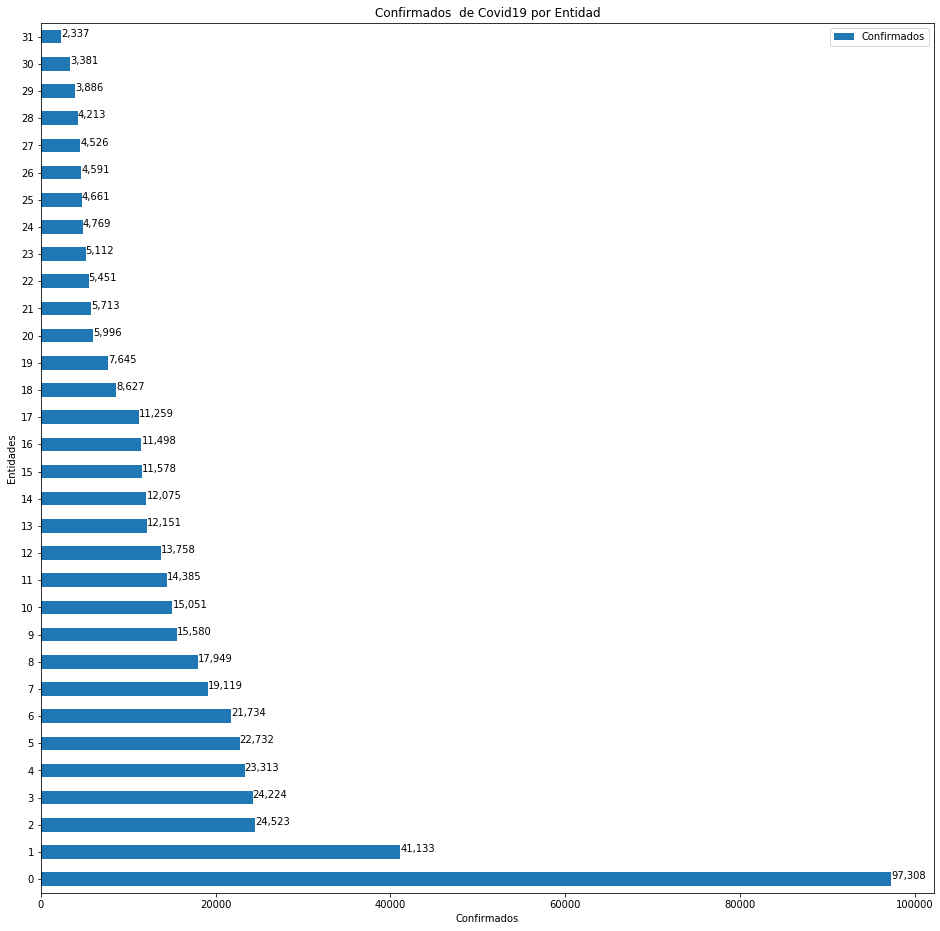

In [40]:

confirmadosEntidad.plot(kind='barh', figsize= (16,16))
plt.title('Confirmados  de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in zip(confirmadosEntidad.index, confirmadosEntidad.Confirmados):
    label = format(value,',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

In [ ]:
entidades.first()

In [ ]:
ConteoEntidad['Confirmados'] = datos['RESULTADO']